# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
SWIRE_cat=Table.read('./data/dmu26_XID+SPIRE_ELAIS-N2_cat.fits')


In [3]:
SWIRE_cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J163354.120+394351.612,248.475501874607,39.7310033402657,2.6505802,5.118328,0.8675735,12.156166,15.493964,8.751965,12.466918,16.685017,8.291224,-1.6563052,-2.9166238,-6.468918,3.8239388,3.9631557,3.7893586,0.99939203,0.99916565,1.0007353,2000.0,2000.0,2000.0,0.112,0.071,0.006
HELP_J163352.386+394403.444,248.468276218376,39.7342898946138,4.010783,6.808458,1.6336573,6.570694,9.904924,3.54075,2.6018512,5.527253,0.7386444,-1.6563052,-2.9166238,-6.468918,3.8239388,3.9631557,3.7893586,1.0019317,0.9998737,0.99898005,2000.0,2000.0,2000.0,0.0,0.014,0.001
HELP_J163352.492+394246.993,248.468716218376,39.7130536946138,3.4164133,7.5486207,1.0031881,4.8085256,9.872386,1.4057926,4.313549,9.847808,1.1799092,-1.6563052,-2.9166238,-6.468918,3.8239388,3.9631557,3.7893586,1.0023422,0.9998984,1.000551,1557.0,2000.0,2000.0,0.274,0.591,0.014
HELP_J163352.915+394257.838,248.470479318376,39.7160660946138,2.8067224,5.2701163,0.91488135,5.151413,8.4280815,1.9740229,4.9021487,9.784857,1.3366607,-1.6563052,-2.9166238,-6.468918,3.8239388,3.9631557,3.7893586,1.00048,0.9988474,1.0016147,2000.0,2000.0,2000.0,0.444,0.825,0.009
HELP_J163350.599+394301.108,248.460827683607,39.71697437126569,6.96759,10.152557,4.018048,11.432376,14.44984,8.45159,13.359283,16.986122,9.564672,-1.6563052,-2.9166238,-6.468918,3.8239388,3.9631557,3.7893586,0.99886453,0.99885386,0.99921536,2000.0,2000.0,2000.0,0.148,0.482,0.002
HELP_J163353.119+394332.116,248.47133095060698,39.7255878742657,19.676233,22.603628,16.701038,21.17224,24.130133,18.036486,12.887502,17.307749,8.782174,-1.6563052,-2.9166238,-6.468918,3.8239388,3.9631557,3.7893586,0.9988038,0.9992942,0.9984742,2000.0,2000.0,2000.0,0.113,0.335,0.009
HELP_J163352.514+394240.707,248.468809963607,39.71130763026569,9.321109,12.985635,5.2218385,9.76094,14.05459,5.080044,8.205181,13.336848,3.2829564,-1.6563052,-2.9166238,-6.468918,3.8239388,3.9631557,3.7893586,0.9990383,1.0011246,0.99875236,2000.0,2000.0,2000.0,0.082,0.731,0.007
HELP_J163355.261+394312.761,248.480254726607,39.7202114822657,16.052073,19.930521,11.455201,16.46131,20.868225,11.781071,8.735839,14.362151,3.4210074,-1.6563052,-2.9166238,-6.468918,3.8239388,3.9631557,3.7893586,0.9992456,0.99891883,1.000127,2000.0,2000.0,2000.0,0.726,0.426,0.029


## Look at Symmetry of PDFs to determine depth level of catalogue

/home/mc741/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


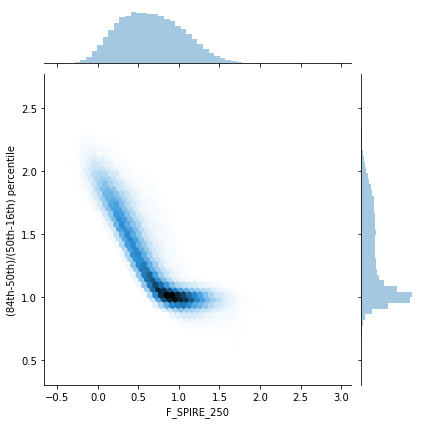

In [4]:
skew=(SWIRE_cat['FErr_SPIRE_250_u']-SWIRE_cat['F_SPIRE_250'])/(SWIRE_cat['F_SPIRE_250']-SWIRE_cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_SPIRE_250']),y=skew, kind='hex')

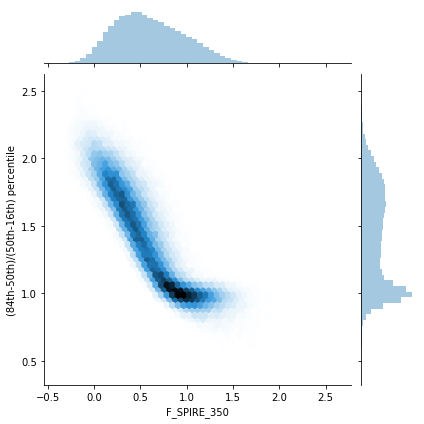

In [5]:
skew=(SWIRE_cat['FErr_SPIRE_350_u']-SWIRE_cat['F_SPIRE_350'])/(SWIRE_cat['F_SPIRE_350']-SWIRE_cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_SPIRE_350']),y=skew, kind='hex')

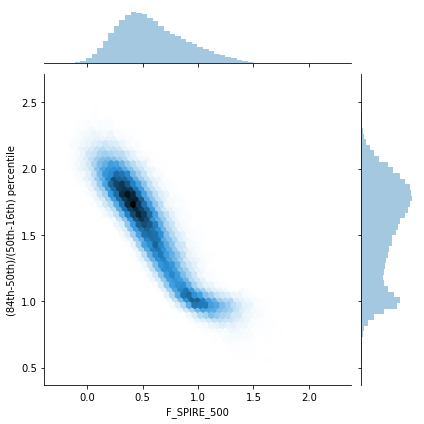

In [6]:
skew=(SWIRE_cat['FErr_SPIRE_500_u']-SWIRE_cat['F_SPIRE_500'])/(SWIRE_cat['F_SPIRE_500']-SWIRE_cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_SPIRE_500']),y=skew, kind='hex')

## Add flag to catalogue

In [7]:
from astropy.table import Column
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_spire_250'))
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_spire_350'))
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_spire_500'))

In [8]:
ind_SWIRE_250=(SWIRE_cat['Pval_res_250']>0.5) | (SWIRE_cat['F_SPIRE_250'] < 4)
ind_SWIRE_350=(SWIRE_cat['Pval_res_350']>0.5) | (SWIRE_cat['F_SPIRE_350'] < 4)
ind_SWIRE_500=(SWIRE_cat['Pval_res_500']>0.5) | (SWIRE_cat['F_SPIRE_500'] < 4)


In [9]:
print(ind_SWIRE_250.sum(),ind_SWIRE_350.sum(),ind_SWIRE_500.sum(),len(SWIRE_cat))

42929 48036 50176 86591


In [10]:
SWIRE_cat['flag_spire_250'][ind_SWIRE_250]=True
SWIRE_cat['flag_spire_350'][ind_SWIRE_350]=True
SWIRE_cat['flag_spire_500'][ind_SWIRE_500]=True

In [11]:
SWIRE_cat.write('./data/dmu26_XID+SPIRE_ELAIS-N2_cat_20181112.fits', format='fits',overwrite=True)


In [22]:
#ind_good=SERVS_cat['flag_spire_250'] | SERVS_cat['flag_spire_350'] | SERVS_cat['flag_spire_500']

In [12]:
ind_good=SWIRE_cat['flag_spire_250'] | SWIRE_cat['flag_spire_350'] | SWIRE_cat['flag_spire_500']

In [13]:
np.invert(ind_good).sum()

20562

In [14]:
SWIRE_cat[np.invert(ind_good)][0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool
HELP_J163350.599+394301.108,248.460827683607,39.71697437126569,6.96759,10.152557,4.018048,11.432376,14.44984,8.45159,13.359283,16.986122,9.564672,-1.6563052,-2.9166238,-6.468918,3.8239388,3.9631557,3.7893586,0.99886453,0.99885386,0.99921536,2000.0,2000.0,2000.0,0.148,0.482,0.002,False,False,False
HELP_J163353.119+394332.116,248.47133095060698,39.7255878742657,19.676233,22.603628,16.701038,21.17224,24.130133,18.036486,12.887502,17.307749,8.782174,-1.6563052,-2.9166238,-6.468918,3.8239388,3.9631557,3.7893586,0.9988038,0.9992942,0.9984742,2000.0,2000.0,2000.0,0.113,0.335,0.009,False,False,False
HELP_J163357.047+394259.807,248.487695474607,39.71661296826569,14.229748,19.653608,8.607487,10.004214,15.776921,4.446027,6.876756,12.125709,2.4523158,-1.6563052,-2.9166238,-6.468918,3.8239388,3.9631557,3.7893586,0.99946314,1.0015651,0.99953645,2000.0,2000.0,2000.0,0.498,0.237,0.009,False,False,False
HELP_J163423.513+394604.845,248.597969313607,39.768012623265705,8.507656,12.982028,3.8436937,5.0112305,9.694271,1.6416258,4.791298,10.132812,1.6007271,-2.1822484,-3.7588477,-6.4708776,4.0898395,5.0106397,5.203005,1.0018967,1.001205,0.9989737,2000.0,2000.0,2000.0,0.02,0.196,0.012,False,False,False
HELP_J163423.745+394558.760,248.598937878607,39.7663222772657,6.1915073,13.834411,1.7502769,6.5824814,14.04511,1.9541914,8.499364,16.870352,2.695157,-2.1822484,-3.7588477,-6.4708776,4.0898395,5.0106397,5.203005,1.0020133,0.9987446,1.0009682,1448.0,2000.0,2000.0,0.016,0.187,0.02,False,False,False
HELP_J163423.871+394554.268,248.599461218376,39.7650744946138,14.6864395,19.868647,9.137153,17.957926,23.421362,11.27836,13.815981,21.022709,6.3656063,-2.1822484,-3.7588477,-6.4708776,4.0898395,5.0106397,5.203005,1.0005555,0.99964356,0.9991751,2000.0,2000.0,2000.0,0.012,0.225,0.022,False,False,False
HELP_J163358.999+394316.237,248.49582898260698,39.7211768252657,26.32695,29.54318,23.345127,22.272144,25.458677,19.154064,11.637581,15.741767,7.521355,-2.1822484,-3.7588477,-6.4708776,4.0898395,5.0106397,5.203005,1.0015484,1.0000072,0.9988977,2000.0,2000.0,2000.0,0.089,0.008,0.059,False,False,False
HELP_J163406.788+394524.144,248.528284418376,39.7567066946138,6.5568676,9.916136,3.3090093,13.728427,17.26359,10.033293,8.222867,12.749792,3.8360884,-2.1822484,-3.7588477,-6.4708776,4.0898395,5.0106397,5.203005,0.9986472,0.9988605,1.0001073,2000.0,2000.0,2000.0,0.002,0.137,0.062,False,False,False
